# Solutions for block B

From DIY, we get how to read and prep the data:

In [1]:
import pandas

url = ("https://docs.google.com/spreadsheets/d/"\
       "1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/"\
       "export?format=csv&gid=1")
url

db = pandas.read_csv(url, skiprows=[0, -1], thousands=",")

## Tasks

An important aspect to realise is that, at the bottom of the table, there's the totals:

In [2]:
db.tail()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
68,2009.0,September,614.0,197,133.0,54.0,70.0
69,2009.0,October,462.0,107,86.0,76.0,74.0
70,2009.0,November,410.0,120,69.0,30.0,32.0
71,2009.0,December,287.0,87,65.0,33.0,35.0
72,NaN,24498,15507.0,4024,3820.0,1147.0,NaN


To avoid including this when looking for the answers to the questions below, we can do several things. Here's a couple of solutions:

1. Use `iloc` to kick out the last row:

In [3]:
db_wo_total1 = db.iloc[:-1, :]
db_wo_total1.tail()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
67,2009.0,August,445.0,206,190.0,64.0,77.0
68,2009.0,September,614.0,197,133.0,54.0,70.0
69,2009.0,October,462.0,107,86.0,76.0,74.0
70,2009.0,November,410.0,120,69.0,30.0,32.0
71,2009.0,December,287.0,87,65.0,33.0,35.0


2. Use `.drop` to explicitly remove the row:

In [4]:
db_wo_total2 = db.drop(72)
db_wo_total2.tail()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
67,2009.0,August,445.0,206,190.0,64.0,77.0
68,2009.0,September,614.0,197,133.0,54.0,70.0
69,2009.0,October,462.0,107,86.0,76.0,74.0
70,2009.0,November,410.0,120,69.0,30.0,32.0
71,2009.0,December,287.0,87,65.0,33.0,35.0


### Obtain the minimum number of civilian casualties (in what month was that?)


In [5]:
db.loc[db["Civilians"]==db["Civilians"].min(), :]

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
2,2004.0,March,19.0,2,NaN,2.0,3.0


### How many NATO casualties were registered in August 2008?


In [6]:
db.query("(Month == 'August') & (Year == 2008)")

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
55,2008.0,August,326.0,46,61.0,46.0,46.0



### What is the month with the most total number of casualties?

In [7]:
total = db_wo_total1.loc[:, "Taliban": "Nato (detailed in spreadsheet)"]\
                    .fillna(0)\
                    .sum(axis=1)
db_wo_total1.loc[total==total.max(), :]

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
32,2006.0,September,945.0,172,97.0,19.0,38.0


This is a trickier one, let's unpack what's going on:

- We build a `total` that gives us the number of total casualties for a given month (note we include the Guardian's version of Nato casualties, but you would have also swapped that for the official figures). See how we use a [range](https://darribas.org/gds_course/content/bB/lab_B.html#index-based-queries) query for that (`"Taliban": "Nato (detailed in spreadsheet)"`)
- One issue that crops up is that some counts are missing. We assume, in this case, that means there were no casualties in that month. In other words, we assume `NaN` values represent counts of zero. Hence, we can replace missing values for 0 using the `fillna` method.
- Once we have a fully filled table, we sum (`.sum`) by row (`axis=1`) to get the total for each month, and query the `db` table to return the rows where the value  in `total` is equal to its maximum value. Note that this only works because `total` and `db` are indexed identically for their rows.

### Can you make a plot of the distribution of casualties over time?

Here again, there are many ways to interpret the solution, and many more to implement it. So do not think your approach is necessarily wrong if it's not the same of what's below. This solution is provided as guidance.

To make a plot of casualties, we need two things:

1. The number of casualties, for which we will use `total` from the previous one
1. A column with decently formatted dates.

A quick and simple solution that gets to 1. (but not necessarily 2.) could be:

<AxesSubplot:>

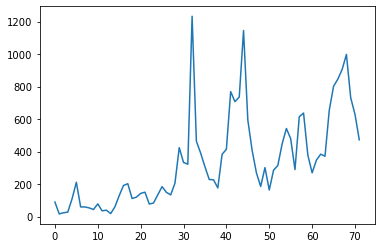

In [8]:
total.plot()

A slightly more polished version could be:

In [9]:
db[db["Year"].isnull()]

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
72,NaN,24498,15507.0,4024,3820.0,1147.0,NaN


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

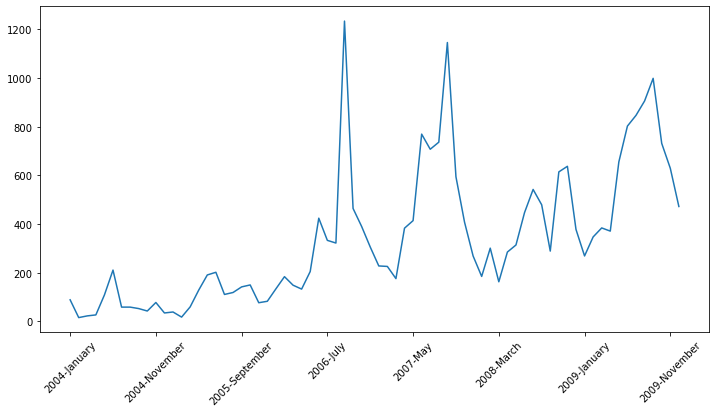

In [10]:
d = db_wo_total1["Year"].astype(int).astype(str) + "-" + db["Month"]
total.rename(d)\
     .plot(figsize=(12, 6), 
           rot=45
          )